In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy as s
import scipy.stats as ss

In [2]:
df = pd.read_csv(r"C:\Users\priya\Downloads\autos.csv", encoding='latin-1')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [4]:
df[['abtest','fuelType','model','gearbox','vehicleType','notRepairedDamage']].mode()
df.replace({'abtest':{np.nan:'test'},'fuelType':{np.nan:'benzin'},'model':{np.nan:'golf'},'gearbox':{np.nan:'manuell'},'vehicleType':{np.nan:'limousine'},'notRepairedDamage':{np.nan:'nein'}},inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          371528 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              371528 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                371528 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             371528 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    371528 non-nu

In [7]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,limousine,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,golf,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,nein,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


### Can you tell me No of Vehicles by Brand Available on ebay for sale with the help of visualization

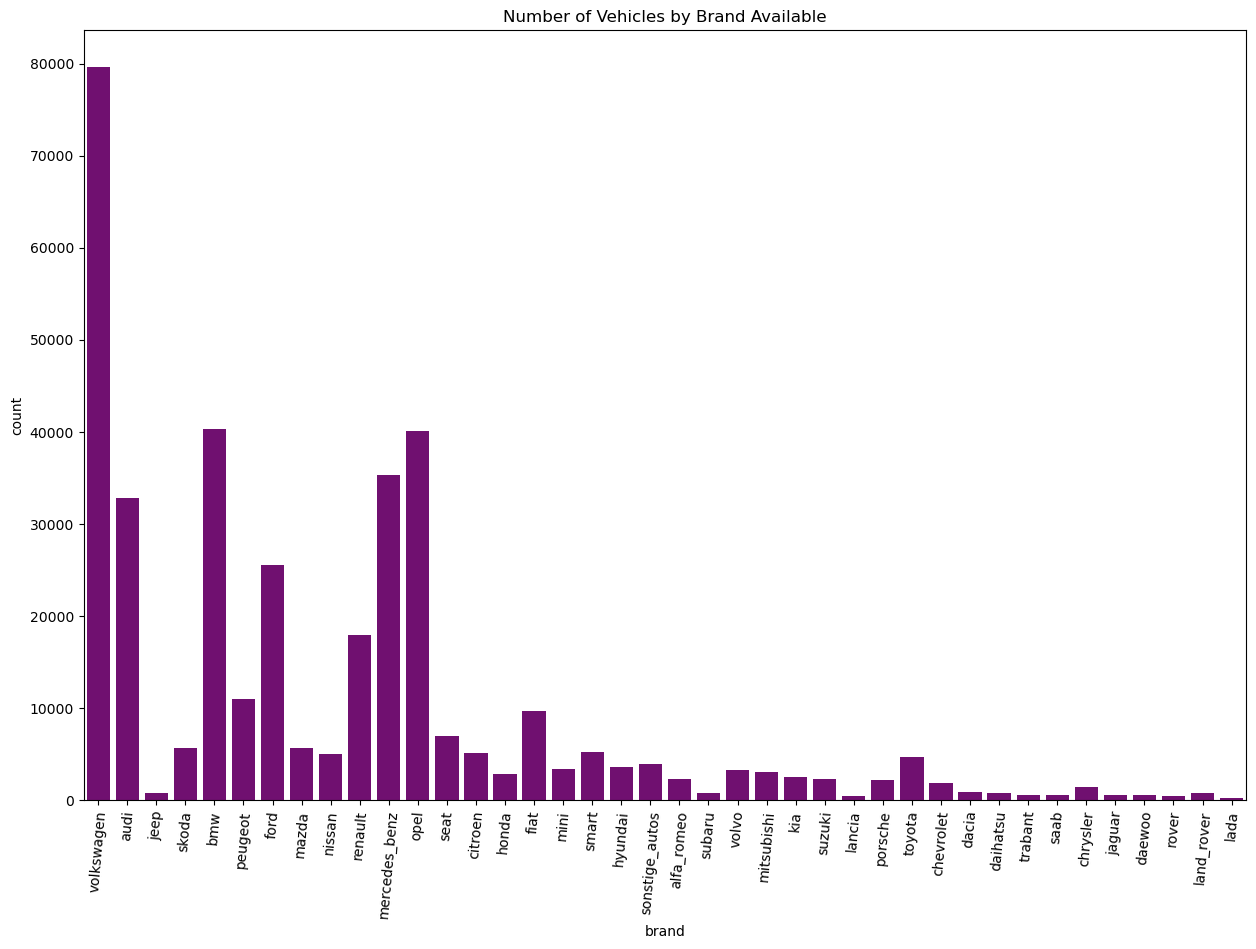

In [21]:
plt.figure(figsize=(15, 10))
sns.countplot(x=df['brand'],color='purple')
plt.xticks(rotation=85)

plt.title('Number of Vehicles by Brand Available')
plt.show()

### What is the Average price for vehicles based on the type of vehicle as well as on the type of gearbox.Explain me with both numerical and visualization analysis

In [26]:
avg=df.groupby(['vehicleType','gearbox'])
avg['price'].mean()

vehicleType  gearbox  
andere       automatik      7366.861496
             manuell      758055.365154
bus          automatik     10599.265713
             manuell       10244.418314
cabrio       automatik     16254.374208
             manuell       14674.193796
coupe        automatik     35500.199567
             manuell       21561.150169
kleinwagen   automatik      3889.552200
             manuell        5842.936603
kombi        automatik      8910.045892
             manuell        7323.746801
limousine    automatik     17375.917378
             manuell       12641.186224
suv          automatik     16764.091774
             manuell        9913.012436
Name: price, dtype: float64

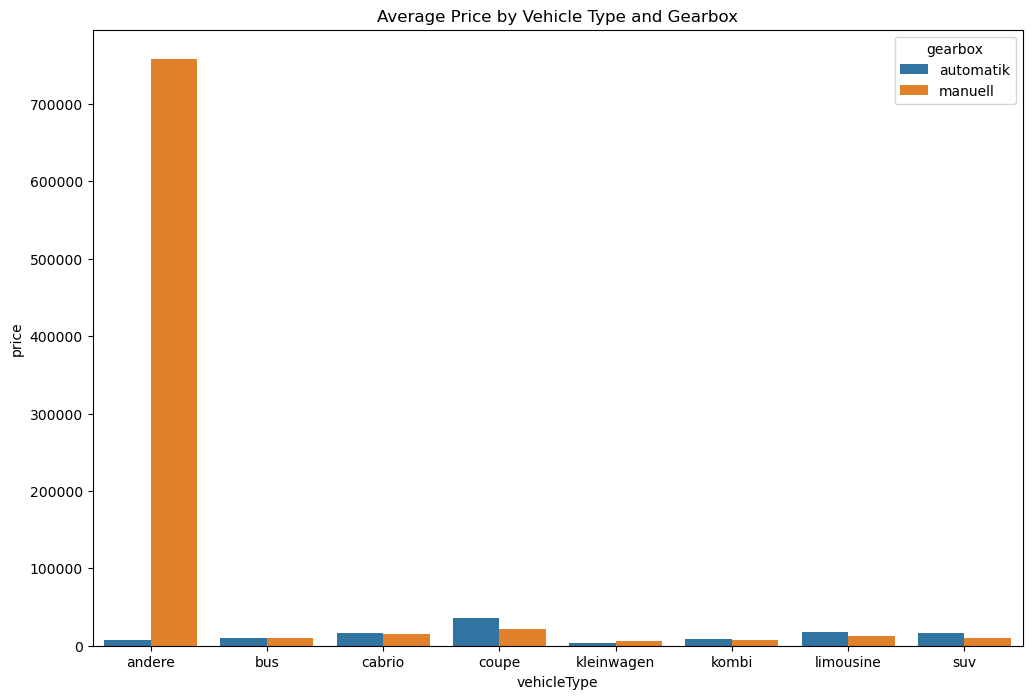

In [28]:
avg_p=df.groupby(['vehicleType', 'gearbox'])['price'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_p, x='vehicleType', y='price', hue='gearbox')
plt.title('Average Price by Vehicle Type and Gearbox')
plt.show()

### What is the marginal probability of private seller